<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not?
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets
import seaborn as sns

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions



# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [2]:


df = pd.read_csv('transfusion.csv')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
df.shape

(748, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


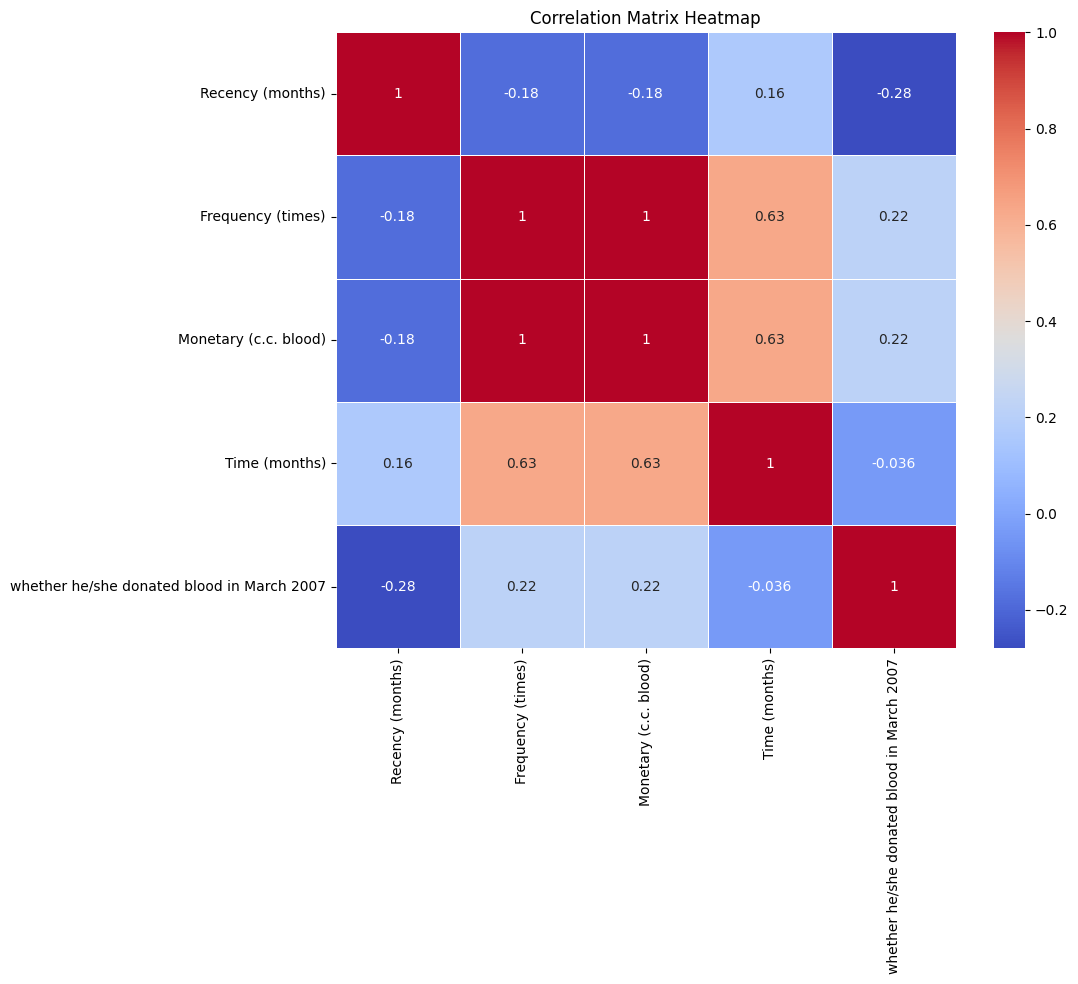

In [6]:
corr = df.corr()

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Check for null values in each column
null_columns = df.isnull().any()

# Print columns with null values
print(null_columns)

Recency (months)                              False
Frequency (times)                             False
Monetary (c.c. blood)                         False
Time (months)                                 False
whether he/she donated blood in March 2007    False
dtype: bool


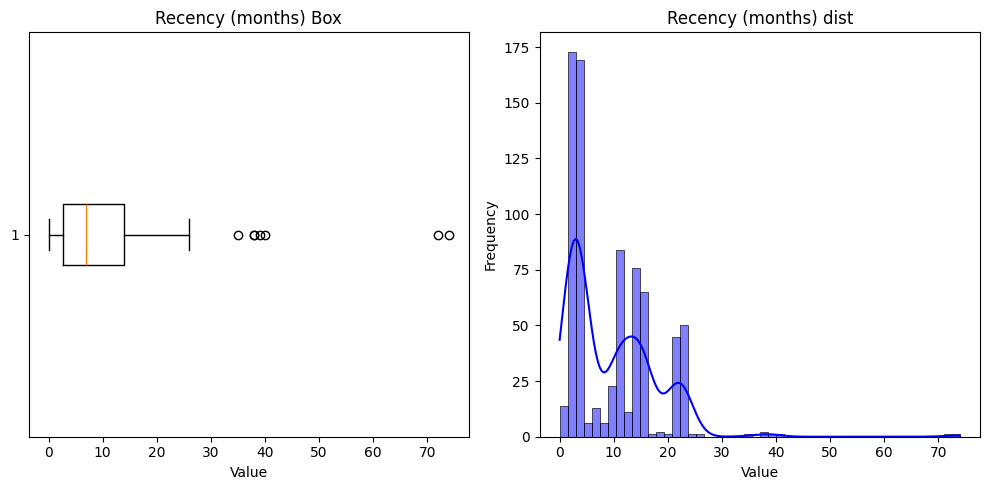

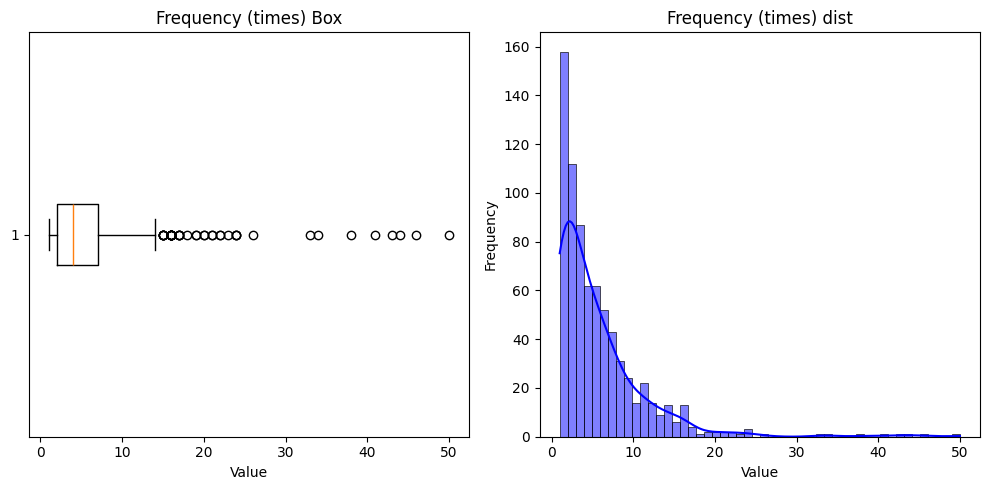

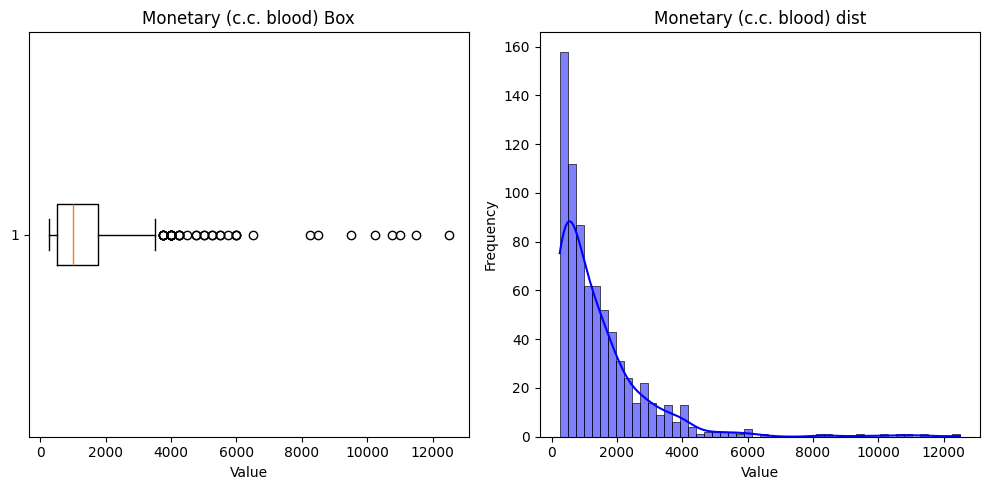

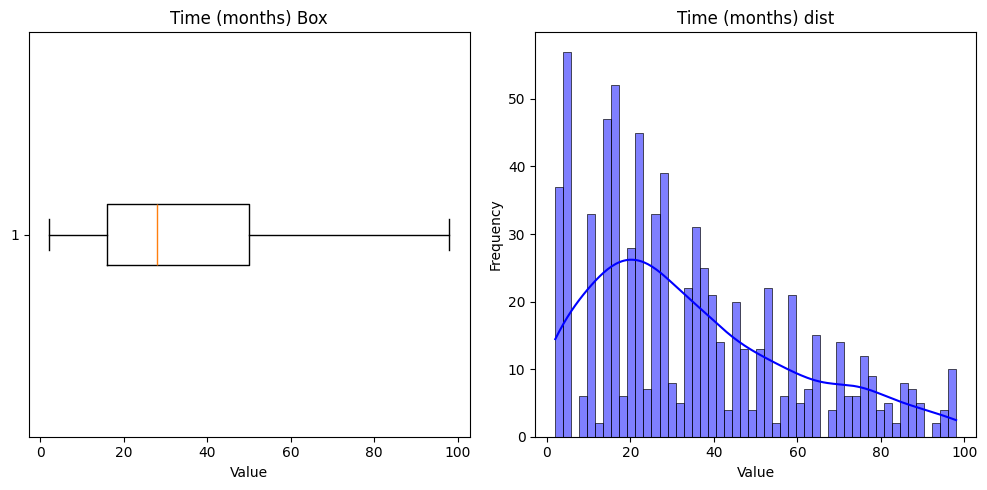

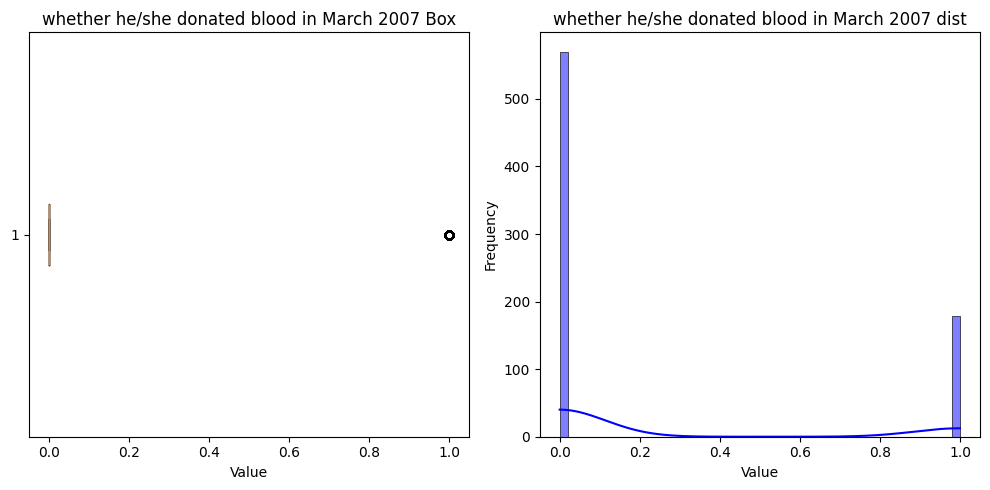

In [8]:
columns = df.columns
for column in columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64' :
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')
        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')
        # Show plot
        plt.tight_layout()
        plt.show()

In [9]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [10]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [11]:
df.columns= ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'Donated Blood']
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Below is a description of each column in our dataset, which uses the RFMTC Model to identify the best donors:¶ <br>
R (Recency - months since the last donation) <br>
F (Frequency - total number of donations) <br>
M (Monetary - total blood donated in c.c.) <br>
T (Time - months since the first donation) <br>
a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)

In [12]:
df.rename(
    columns={'Donated Blood': 'target'},
    inplace=True)

In [13]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [14]:
# Print target incidence as a proportion using normalize=True
df.target.value_counts(normalize=True).round(2)

target
0    0.76
1    0.24
Name: proportion, dtype: float64

### from above - 76% of donors did not donate blood during the next visit of the mobile donation vehicle.

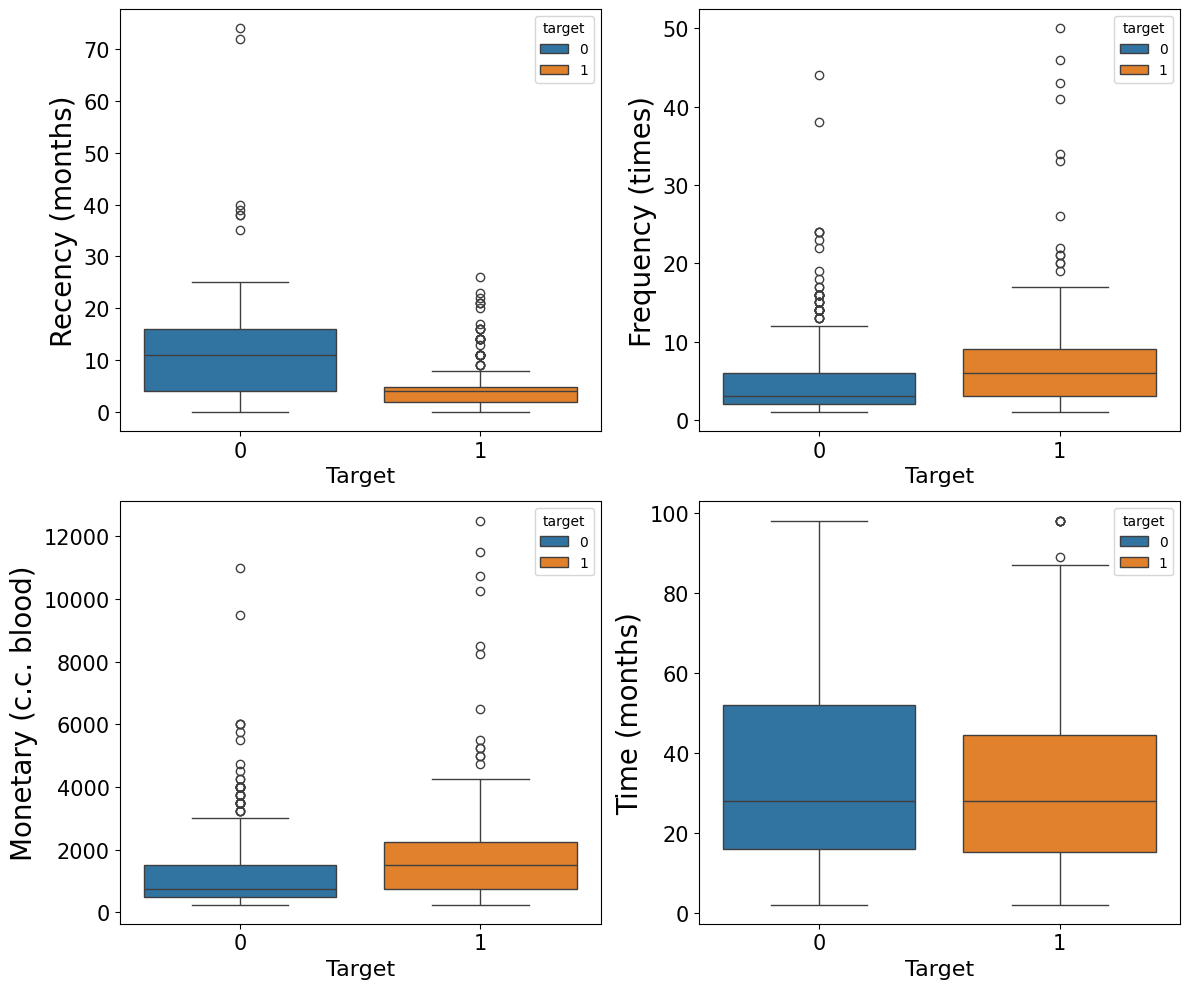

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the variables to include in the boxplot
variables = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

# Create a boxplot for each variable comparing the 'target'
# Set the 'hue' parameter to 'target'
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.boxplot(x='target', y=var, data=df, ax=axes[row, col], hue='target')
    
    # Increase font size of x and y labels
    axes[row, col].set_xlabel("Target", fontsize=16)
    axes[row, col].set_ylabel(var, fontsize=20)
    
    # Increase font size of x and y axis titles
    axes[row, col].xaxis.set_tick_params(labelsize=15) 
    axes[row, col].yaxis.set_tick_params(labelsize=15)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? <br>
Ans : All 
- Is there an output variable (label)? <br>
Ans : "Target" - donated blood or not
- If there is an output variable: <br>
    - What is it?
    target
    - What is its type?
    int
- What type of Modelling is it? <br>
    - [X ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ X] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target
X = df.drop(columns='target')
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = classifier.predict(X_train)

# Make predictions on the testing data
y_test_pred = classifier.predict(X_test)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:')
print(train_report)
print('Training Confusion Matrix:')
print(train_confusion_matrix)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)
print('Test Confusion Matrix:')
print(test_confusion_matrix)


Training Accuracy: 0.9579349904397706
Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       405
           1       0.99      0.82      0.90       118

    accuracy                           0.96       523
   macro avg       0.97      0.91      0.94       523
weighted avg       0.96      0.96      0.96       523

Training Confusion Matrix:
[[404   1]
 [ 21  97]]
Test Accuracy: 0.6888888888888889
Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       165
           1       0.40      0.35      0.38        60

    accuracy                           0.69       225
   macro avg       0.59      0.58      0.58       225
weighted avg       0.68      0.69      0.68       225

Test Confusion Matrix:
[[134  31]
 [ 39  21]]


# Step 7: Split the Data  - AS ABOVE

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

# Step 8: Define a Model -  - AS ABOVE

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Fit the Model -  - AS ABOVE

# Step 10: Verify and Evaluate the Training Model -  - AS ABOVE
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model -  - AS ABOVE
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

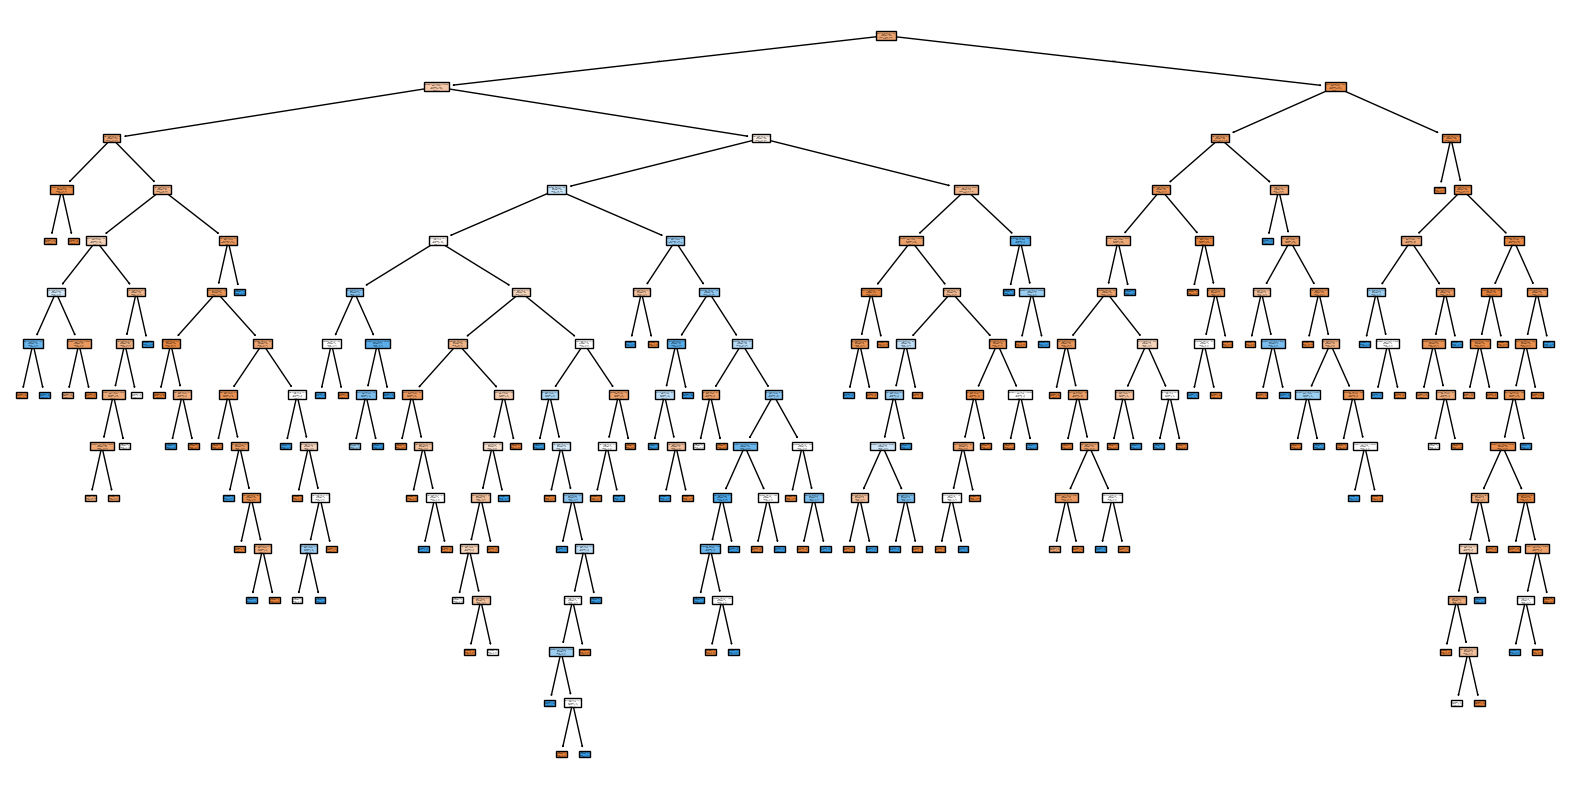

In [17]:
from sklearn import tree


# Assuming df is your DataFrame and you already have X and y defined from it
feature_names = X.columns
class_names = y.unique().astype(str)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(classifier, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()


## - Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target
X = df.drop(columns='target')
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = classifier.predict(X_train)

# Make predictions on the testing data
y_test_pred = classifier.predict(X_test)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:')
print(train_report)
print('Training Confusion Matrix:')
print(train_confusion_matrix)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)
print('Test Confusion Matrix:')
print(test_confusion_matrix)


Training Accuracy: 0.9579349904397706
Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       405
           1       0.97      0.84      0.90       118

    accuracy                           0.96       523
   macro avg       0.96      0.92      0.94       523
weighted avg       0.96      0.96      0.96       523

Training Confusion Matrix:
[[402   3]
 [ 19  99]]
Test Accuracy: 0.72
Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       165
           1       0.46      0.27      0.34        60

    accuracy                           0.72       225
   macro avg       0.61      0.58      0.58       225
weighted avg       0.69      0.72      0.69       225

Test Confusion Matrix:
[[146  19]
 [ 44  16]]


### plotting for One Tree

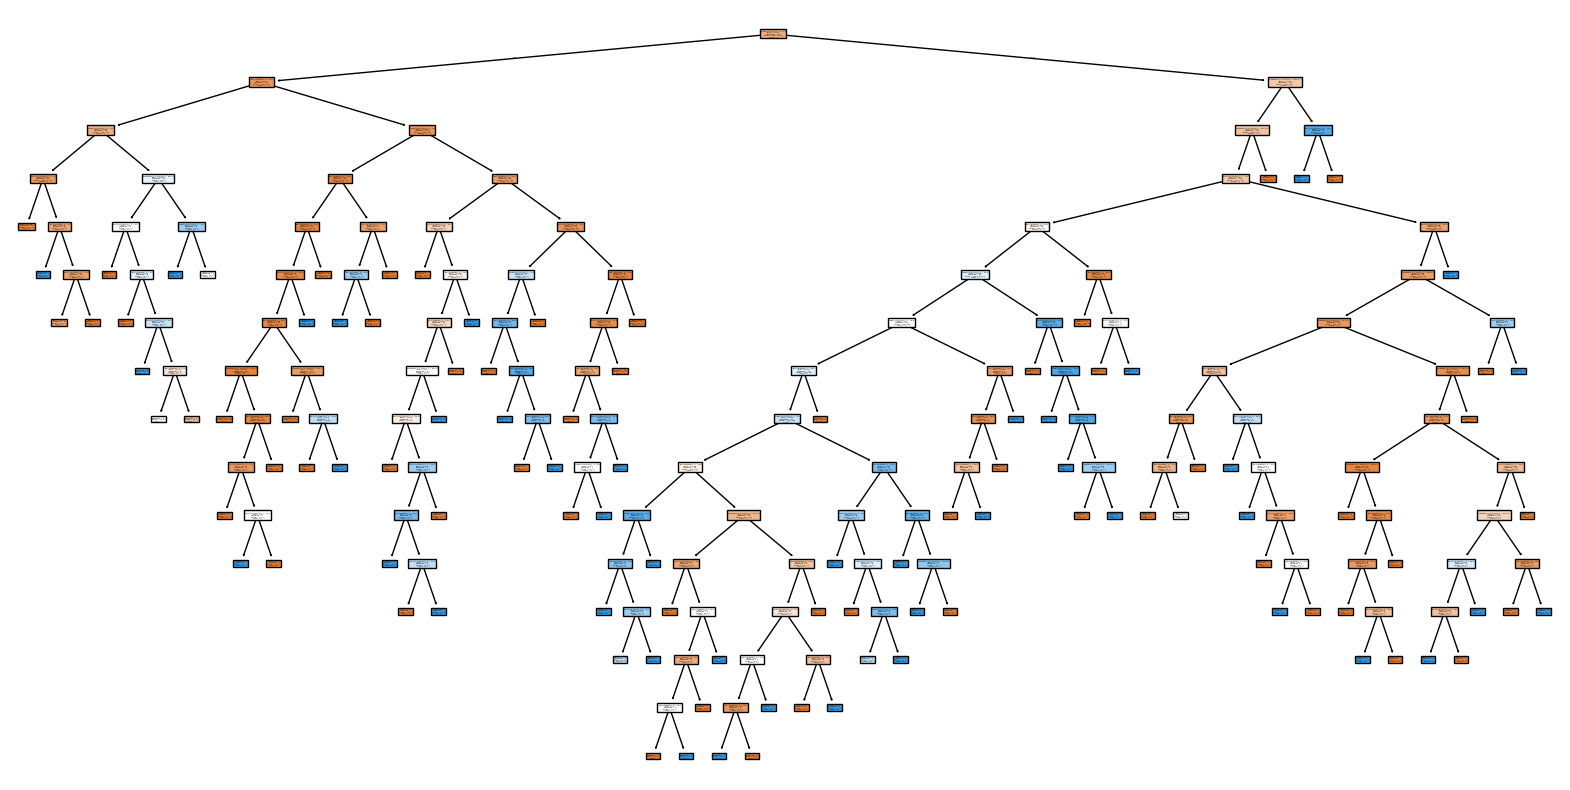

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot one of the trees in the Random Forest
plt.figure(figsize=(20, 10))
tree.plot_tree(classifier.estimators_[0], feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.show()




---



---



> > > > > > > > > © 2024 Institute of Data


---



---





## Trying my ML run all function

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier


def get_model_and_param_grid(model_type):
    if model_type == "LogisticRegression":
        model = LogisticRegression()
        apply_scaling = True
        param_grid = {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.01, 0.1, 1, 10, 100]
        }
        is_ensemble_allowed = True
    elif model_type == "DecisionTree":
        model = DecisionTreeClassifier()
        apply_scaling = False
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50]
        }
        is_ensemble_allowed = True
    elif model_type == "RandomForest":
        model = RandomForestClassifier()
        apply_scaling = False
        param_grid = {
            'n_estimators': [10, 50, 100, 200],
            'criterion': ['gini'],
            'max_depth': [None, 10, 20, 30, 40, 50]
        }
        is_ensemble_allowed = True
    elif model_type == "KNeighbors":
        model = KNeighborsClassifier()
        apply_scaling = True
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']
        }
        is_ensemble_allowed = False
    elif model_type == "SVM":
        model = SVC(probability=True)
        apply_scaling = True
        param_grid = {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
        is_ensemble_allowed = False
    elif model_type == "AdaBoost":
        model = AdaBoostClassifier()
        apply_scaling = False
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
        is_ensemble_allowed = False
    elif model_type == "XGBoost":
        model = XGBClassifier()
        apply_scaling = False
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
        is_ensemble_allowed = False
    else:
        raise ValueError("Invalid model type provided.")
    
    return model, param_grid, apply_scaling, is_ensemble_allowed


def scale_features(X, apply_scaling):
    if apply_scaling:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    return X


def split_data(X, y, test_size=0.3, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


def perform_ensemble_grid_search(X_train, y_train, model_type):
    
    model1, param_grid1, _, _ = get_model_and_param_grid('LogisticRegression')
    model2, param_grid2, _, _ = get_model_and_param_grid('DecisionTree')
    model3, param_grid3, _, _ = get_model_and_param_grid('RandomForest')
    
    model1 = perform_grid_search(model1, param_grid1, X_train, y_train)
    model2 = perform_grid_search(model2, param_grid2, X_train, y_train)
    model3 = perform_grid_search(model3, param_grid3, X_train, y_train)
    
    ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3)], voting='soft')
    ensemble_model.fit(X_train, y_train)
    return ensemble_model


def evaluate_metrics(y_true, y_pred, y_prob):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_prob)
    }
    return metrics


def plot_confusion_matrix(y_true, y_pred, target_labels, model_type):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cm_labels = np.array([[f'TN\n{tn}', f'FP\n{fp}'], [f'FN\n{fn}', f'TP\n{tp}']])

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues',
                xticklabels=[f'Predicted: {target_labels[0]}', f'Predicted: {target_labels[1]}'],
                yticklabels=[f'Actual: {target_labels[0]}', f'Actual: {target_labels[1]}'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_type}')
    plt.show()


def plot_roc_curve(y_true, y_prob, model_type):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label=f'{model_type} (AUC = {roc_auc_score(y_true, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()


def evaluate_classification_model(df, target_var, feature_list, model_type, target_labels, run_ensemble_mode=False):
    X = df[feature_list]
    y = df[target_var]
    
    try:
        if not run_ensemble_mode:
            # Initialize the model and parameter grid
            model, param_grid, apply_scaling, is_ensemble_allowed = get_model_and_param_grid(model_type)
            # Apply scaling if necessary
            X = scale_features(X, apply_scaling)
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = split_data(X, y)
            # Perform GridSearchCV
            optimized_clf = perform_grid_search(model, param_grid, X_train, y_train)
            ensemble_model_name = model_type
        
        
        
        if run_ensemble_mode:
            # Use an ensemble voting classifier
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = split_data(X, y)
            optimized_clf = perform_ensemble_grid_search(X_train, y_train, model_type)
            ensemble_model_name = model_type
     
        
        # Predictions
        train_preds = optimized_clf.predict_proba(X_train)[:, 1]
        test_preds = optimized_clf.predict_proba(X_test)[:, 1]
        train_class_preds = optimized_clf.predict(X_train)
        test_class_preds = optimized_clf.predict(X_test)
        
        # Evaluate metrics
        train_metrics = evaluate_metrics(y_train, train_class_preds, train_preds)
        test_metrics = evaluate_metrics(y_test, test_class_preds, test_preds)

        print(f"Model: {ensemble_model_name}")
        print("The accuracy on train data is ", train_metrics['accuracy'])
        print("The accuracy on test data is ", test_metrics['accuracy'])
        print("The precision on train data is ", train_metrics['precision'])
        print("The precision on test data is ", test_metrics['precision'])
        print("The recall on train data is ", train_metrics['recall'])
        print("The recall on test data is ", test_metrics['recall'])
        print("The f1 on train data is ", train_metrics['f1'])
        print("The f1 on test data is ", test_metrics['f1'])
        print("The roc_auc_score on test data is ", test_metrics['roc_auc'])
        
        plot_confusion_matrix(y_test, test_class_preds, target_labels, ensemble_model_name)
        plot_roc_curve(y_test, test_preds, ensemble_model_name)
        
        # Return metrics and test predictions for ROC curve
        return {
            'model_type': ensemble_model_name,
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'test_preds': test_preds,
            'y_test': y_test
        }
    except ValueError as e:
        print(e)
        return None


def evaluate_classification_models(models, df, target_var, feature_list, target_labels):
    results = []

    run_ensemble_mode = False

    ## Run for all modles
    for model in models:
        result = evaluate_classification_model(df, target_var, feature_list, model, target_labels, run_ensemble_mode)
        if result is not None:
            results.append(result)
    ## Run for Ensemble model 
    run_ensemble_mode = True
    if run_ensemble_mode:
        model = 'ensemble_ML'
        result = evaluate_classification_model(df, target_var, feature_list, model, target_labels, run_ensemble_mode)
        if result is not None:
            results.append(result)

    # Convert results to a DataFrame for easier plotting
    metrics_df = pd.DataFrame({
        'model_type': [res['model_type'] for res in results],
        'test_accuracy': [res['test_metrics']['accuracy'] for res in results],
        'test_precision': [res['test_metrics']['precision'] for res in results],
        'test_recall': [res['test_metrics']['recall'] for res in results],
        'test_f1': [res['test_metrics']['f1'] for res in results],
        'test_roc_auc': [res['test_metrics']['roc_auc'] for res in results]
    })

    # Plot the metrics comparison for all models
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='model_type', y=f'test_{metric}', data=metrics_df)
        plt.title(f'Test {metric.capitalize()} Comparison')
        plt.ylabel(f'Test {metric.capitalize()}')
        plt.xlabel('Model Type')
        plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
        plt.show()

    # Plot ROC AUC curves for all models
    plt.figure(figsize=(10, 8))
    for result in results:
        model_type = result['model_type']
        fpr, tpr, _ = roc_curve(result['y_test'], result['test_preds'])
        plt.plot(fpr, tpr, label=f"{model_type} (AUC = {result['test_metrics']['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc='best')
    plt.show()


'''
target_var = 'def_pay'
feature_list = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','AGE',\
                'PAY_1','PAY_2','PAY_3','PAY_4', 'PAY_5','PAY_6', \
                'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', \
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',  ]
target_labels = ['Yes','No']

models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighbors', 'SVM', 'AdaBoost', 'XGBoost']
# Run without ensemble mode
evaluate_classification_models(models, defaulters, target_var, feature_list, target_labels, run_ensemble_mode=False)
# Run with ensemble mode
evaluate_classification_models(models, defaulters, target_var, feature_list, target_labels, run_ensemble_mode=True)
'''


"\ntarget_var = 'def_pay'\nfeature_list = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','AGE',                'PAY_1','PAY_2','PAY_3','PAY_4', 'PAY_5','PAY_6',                 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',                 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',  ]\ntarget_labels = ['Yes','No']\n\nmodels = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighbors', 'SVM', 'AdaBoost', 'XGBoost']\n# Run without ensemble mode\nevaluate_classification_models(models, defaulters, target_var, feature_list, target_labels, run_ensemble_mode=False)\n# Run with ensemble mode\nevaluate_classification_models(models, defaulters, target_var, feature_list, target_labels, run_ensemble_mode=True)\n"

In [21]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Model: LogisticRegression
The accuracy on train data is  0.7877629063097514
The accuracy on test data is  0.7377777777777778
The precision on train data is  0.7058823529411765
The precision on test data is  0.5555555555555556
The recall on train data is  0.1016949152542373
The recall on test data is  0.08333333333333333
The f1 on train data is  0.17777777777777778
The f1 on test data is  0.14492753623188406
The roc_auc_score on test data is  0.7583333333333333


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

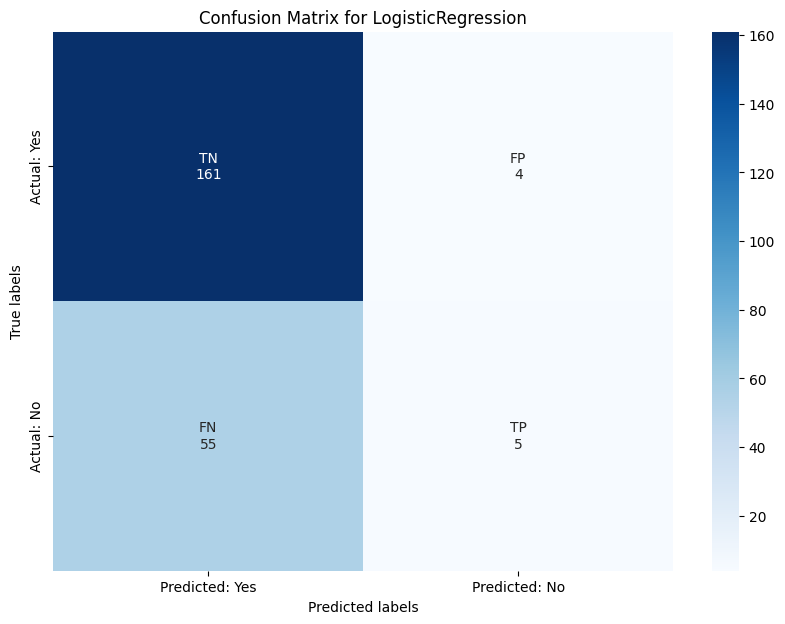

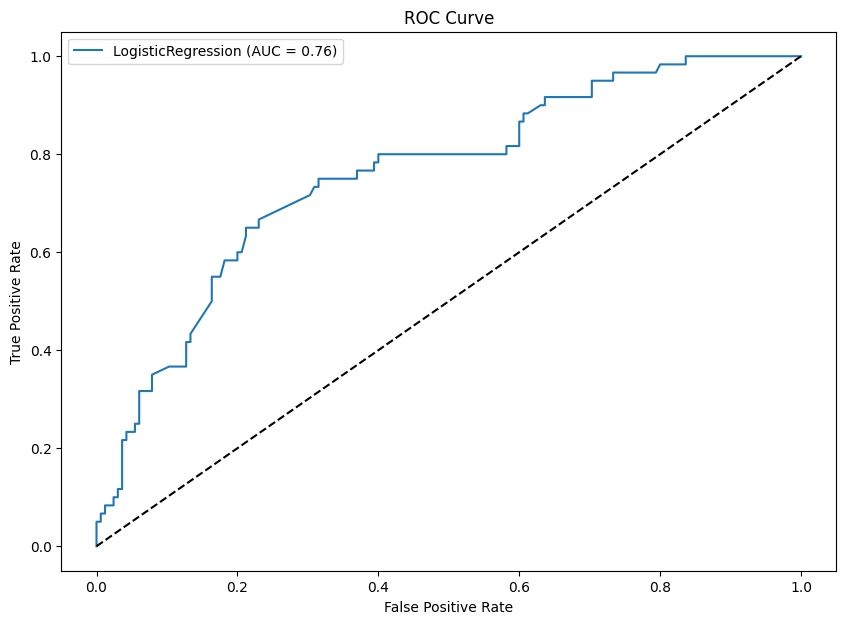

Model: DecisionTree
The accuracy on train data is  0.9063097514340345
The accuracy on test data is  0.68
The precision on train data is  0.896551724137931
The precision on test data is  0.3695652173913043
The recall on train data is  0.6610169491525424
The recall on test data is  0.2833333333333333
The f1 on train data is  0.7609756097560976
The f1 on test data is  0.32075471698113206
The roc_auc_score on test data is  0.6087878787878788


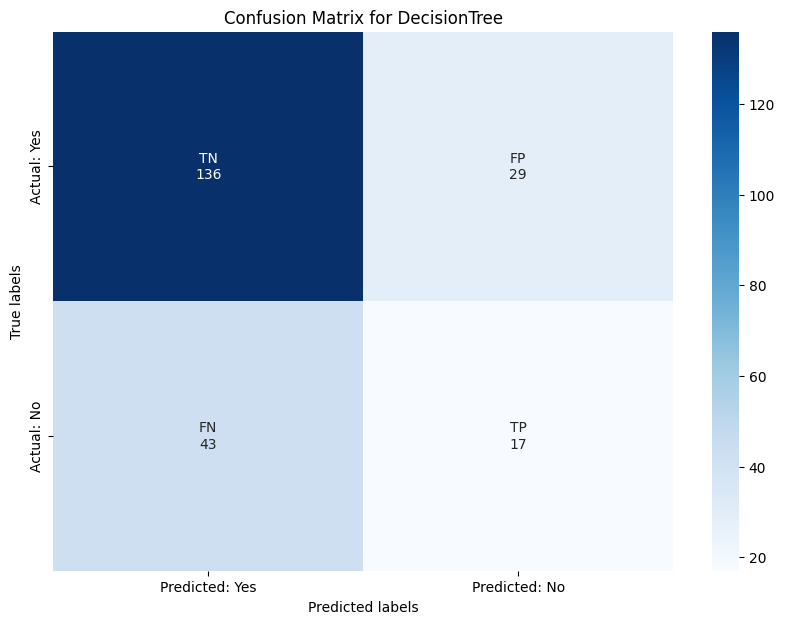

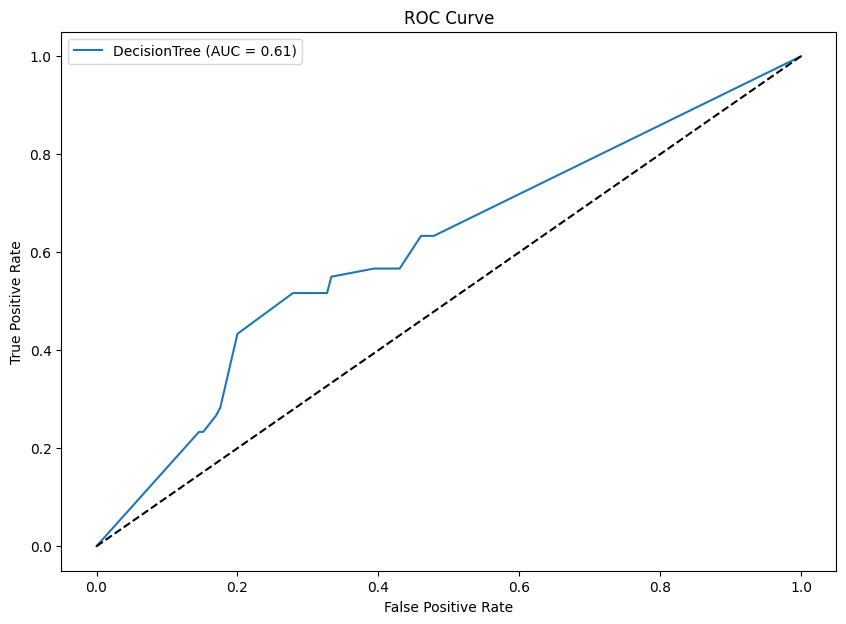

Model: RandomForest
The accuracy on train data is  0.9330783938814532
The accuracy on test data is  0.7466666666666667
The precision on train data is  0.946236559139785
The precision on test data is  0.5517241379310345
The recall on train data is  0.7457627118644068
The recall on test data is  0.26666666666666666
The f1 on train data is  0.8341232227488151
The f1 on test data is  0.3595505617977528
The roc_auc_score on test data is  0.6750505050505051


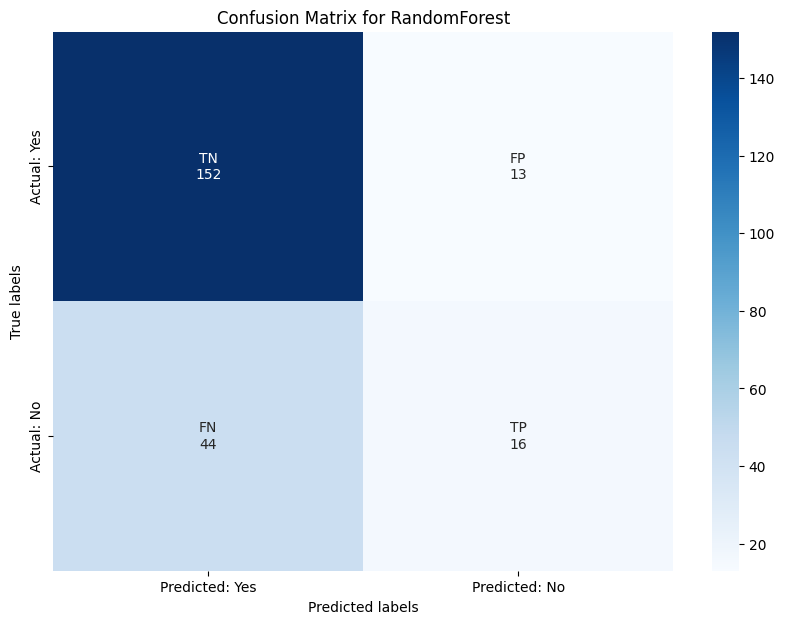

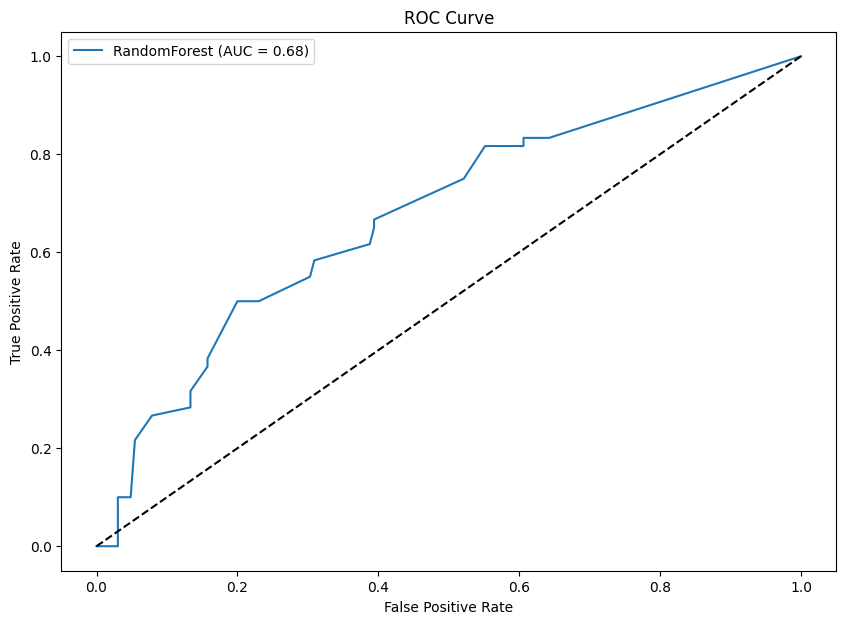

Model: KNeighbors
The accuracy on train data is  0.8317399617590823
The accuracy on test data is  0.7377777777777778
The precision on train data is  0.6973684210526315
The precision on test data is  0.5151515151515151
The recall on train data is  0.4491525423728814
The recall on test data is  0.2833333333333333
The f1 on train data is  0.5463917525773195
The f1 on test data is  0.3655913978494624
The roc_auc_score on test data is  0.7067171717171717


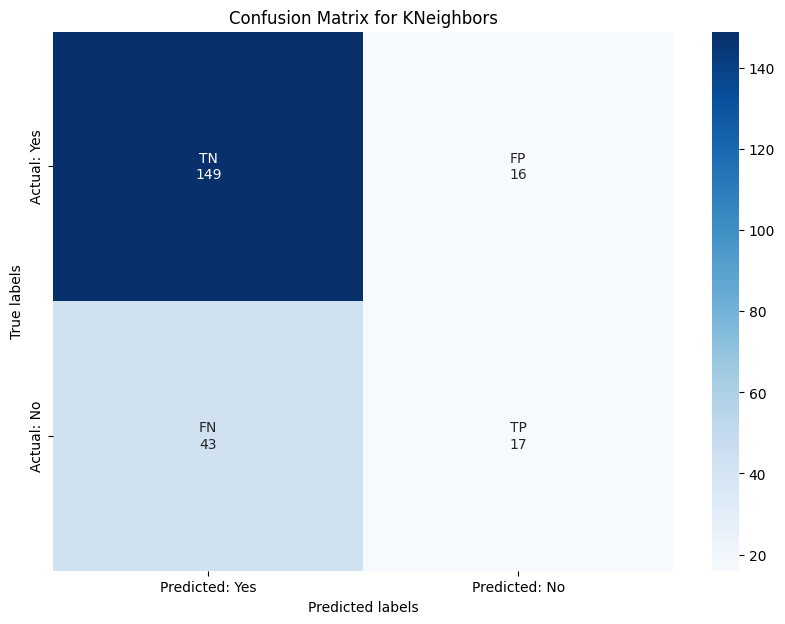

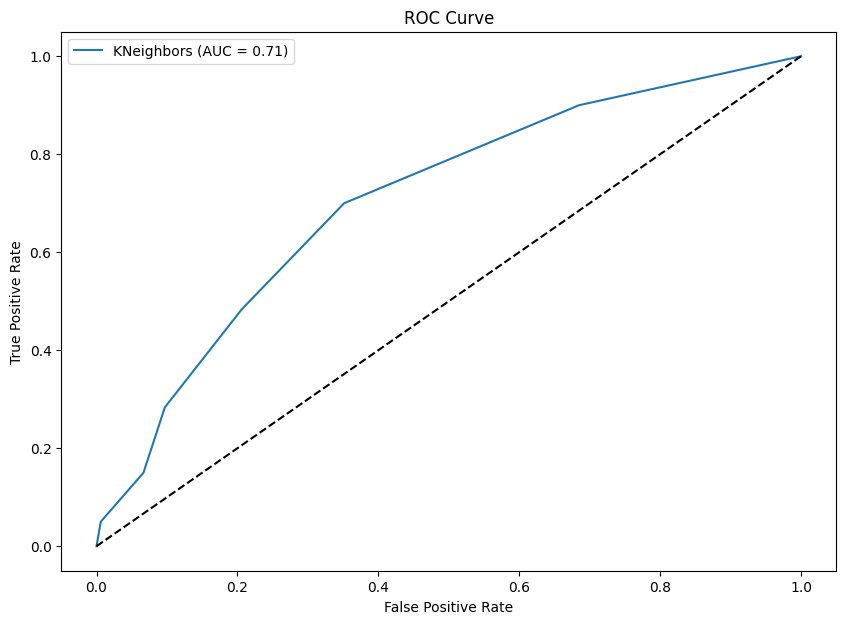

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Model: AdaBoost
The accuracy on train data is  0.8164435946462715
The accuracy on test data is  0.7555555555555555
The precision on train data is  0.7894736842105263
The precision on test data is  0.6666666666666666
The recall on train data is  0.2542372881355932
The recall on test data is  0.16666666666666666
The f1 on train data is  0.38461538461538464
The f1 on test data is  0.26666666666666666
The roc_auc_score on test data is  0.7254040404040404


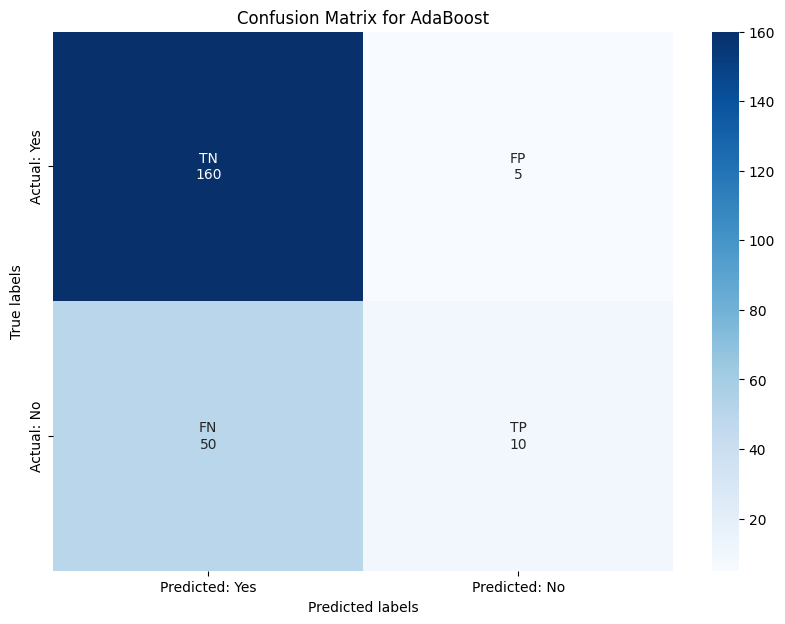

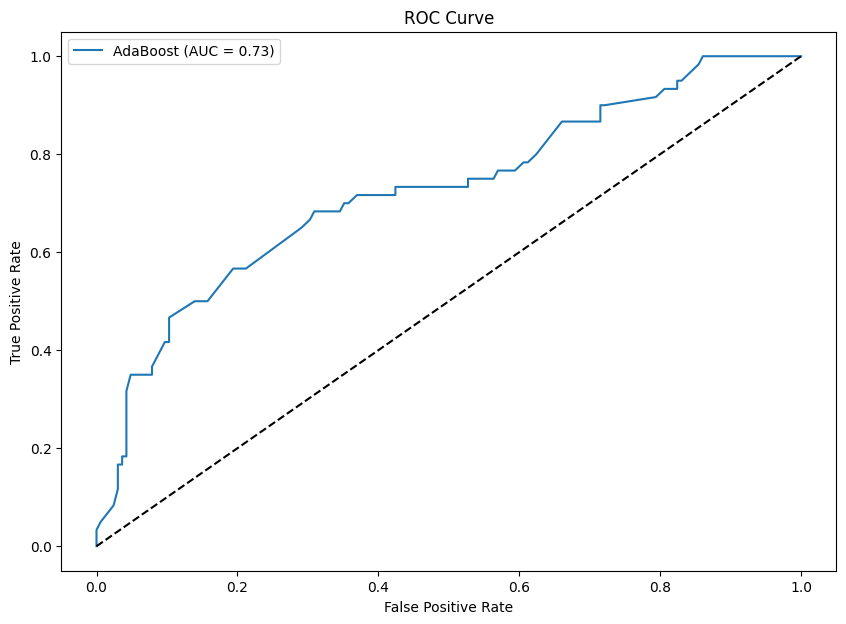

Model: XGBoost
The accuracy on train data is  0.8451242829827916
The accuracy on test data is  0.7244444444444444
The precision on train data is  0.7846153846153846
The precision on test data is  0.45454545454545453
The recall on train data is  0.4322033898305085
The recall on test data is  0.16666666666666666
The f1 on train data is  0.5573770491803278
The f1 on test data is  0.24390243902439024
The roc_auc_score on test data is  0.7028787878787879


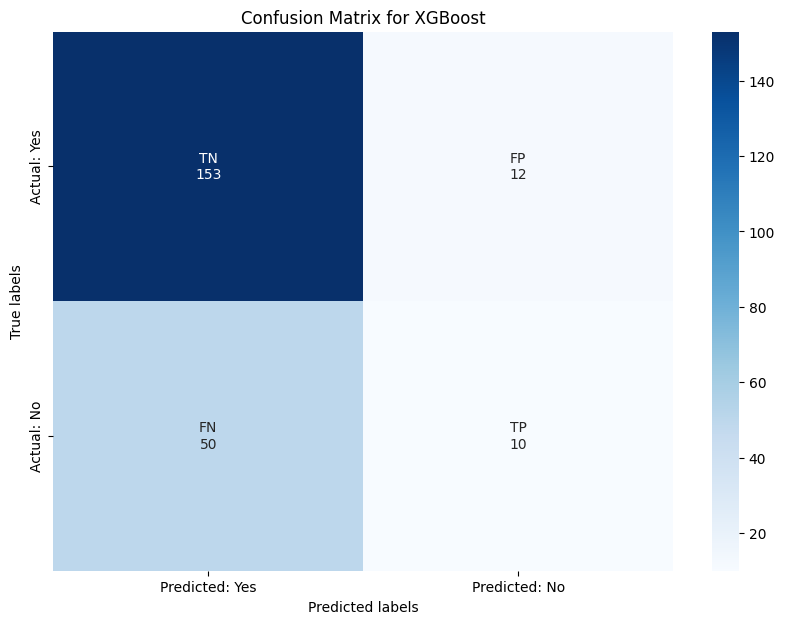

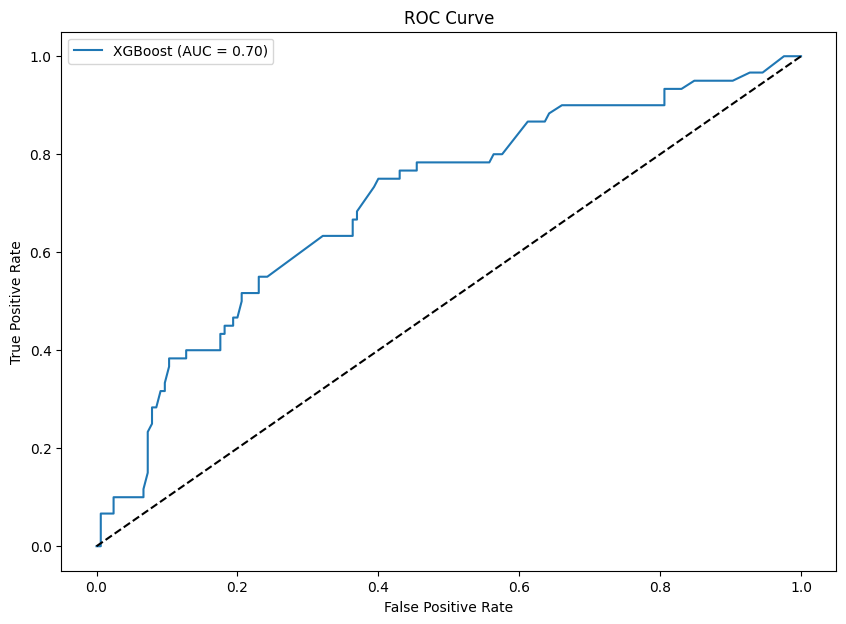

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

Model: ensemble_ML
The accuracy on train data is  0.9579349904397706
The accuracy on test data is  0.7022222222222222
The precision on train data is  0.9897959183673469
The precision on test data is  0.4222222222222222
The recall on train data is  0.8220338983050848
The recall on test data is  0.31666666666666665
The f1 on train data is  0.8981481481481481
The f1 on test data is  0.3619047619047619
The roc_auc_score on test data is  0.6897474747474748


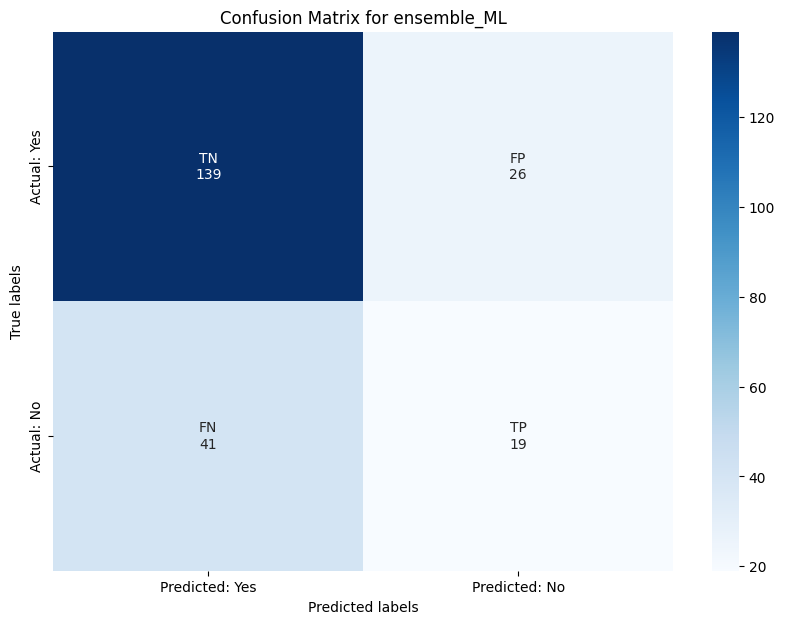

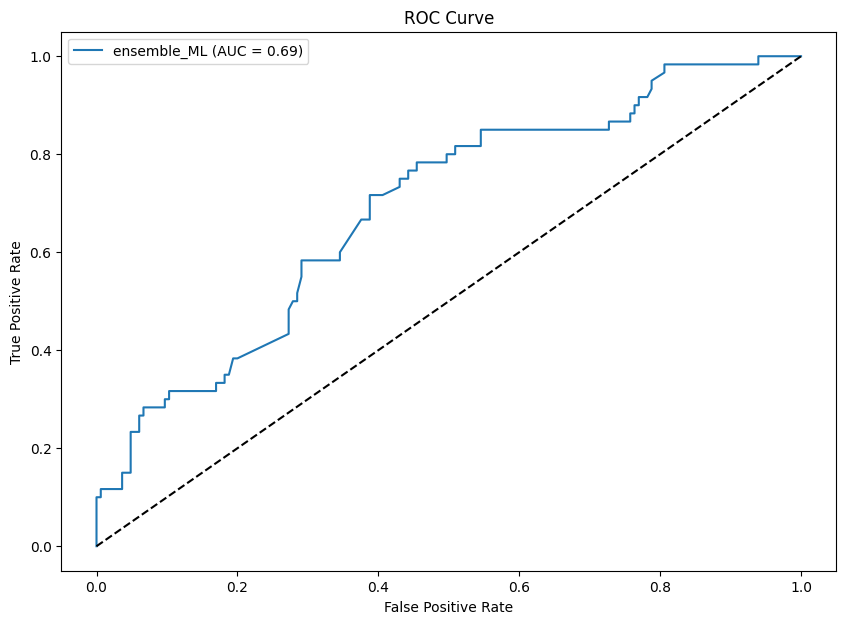

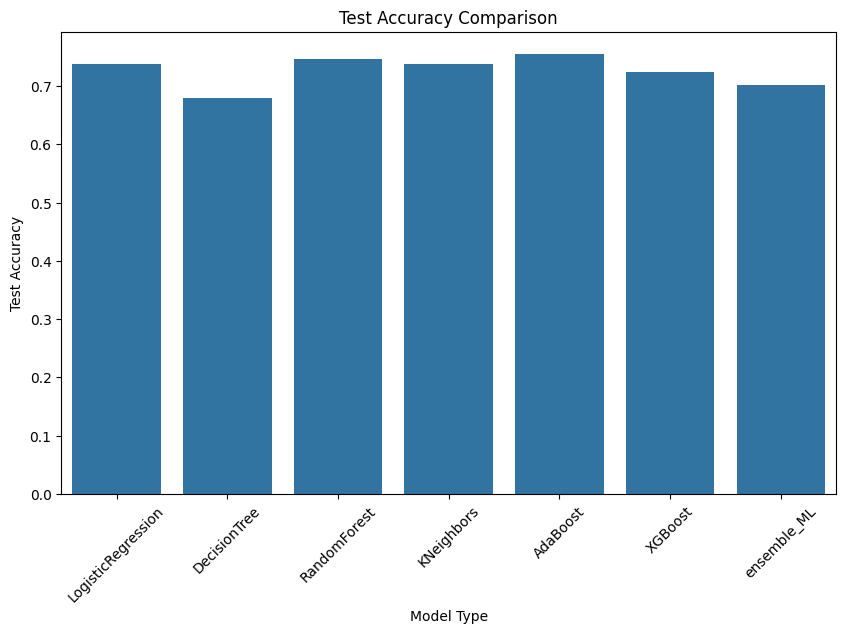

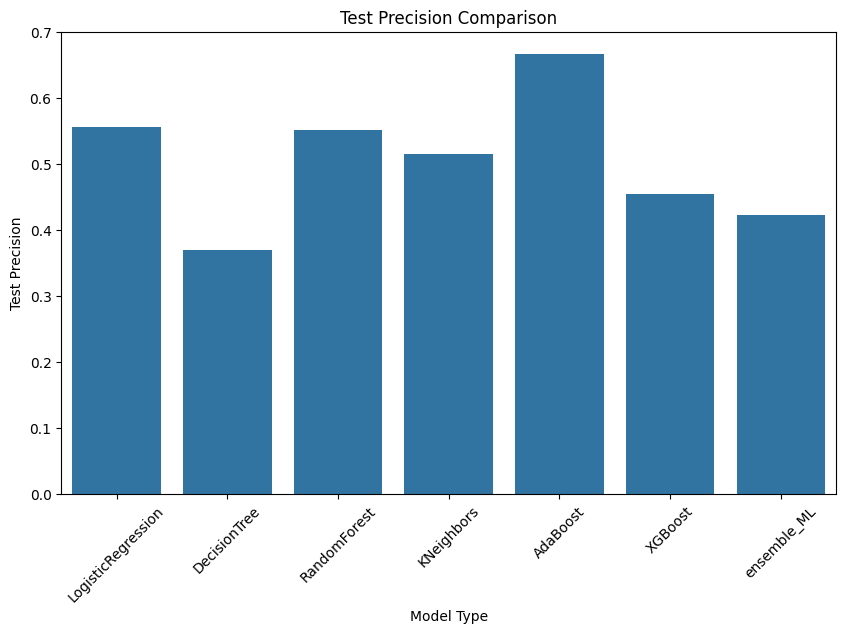

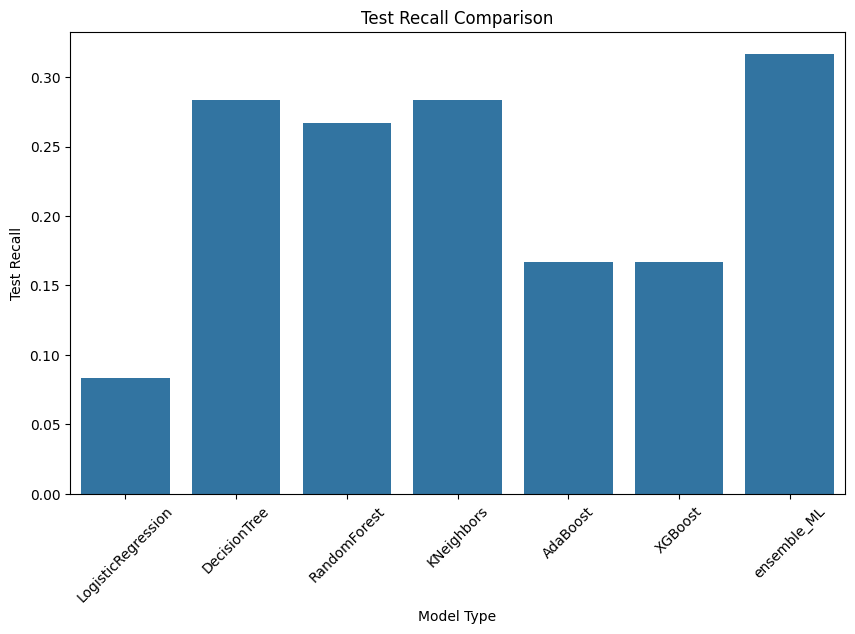

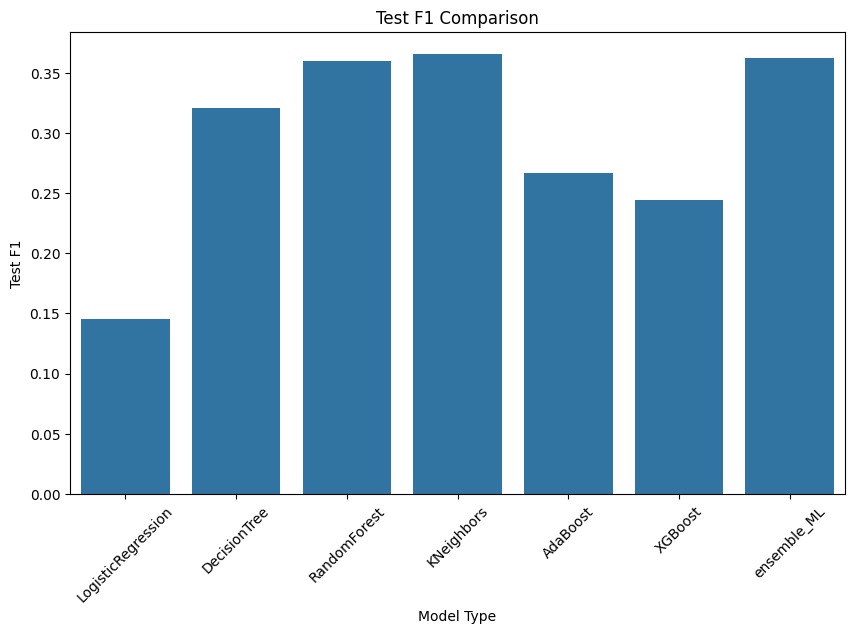

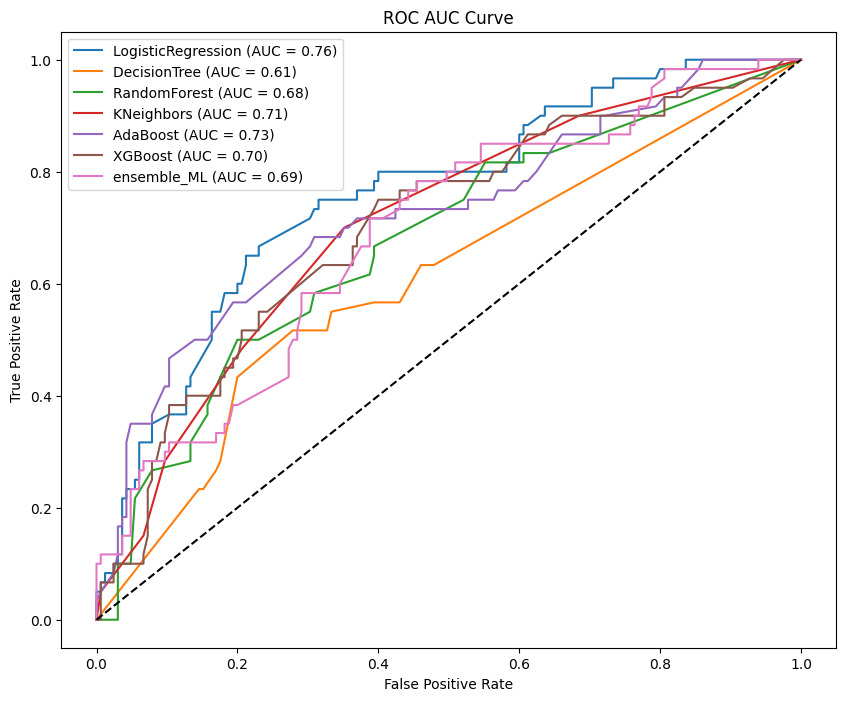

In [22]:
target_var = 'target'
feature_list = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']
target_lables = ['Yes','No']

models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighbors', 'AdaBoost', 'XGBoost']
#models = ['LogisticRegression', 'DecisionTree','KNeighbors']
evaluate_classification_models(models, df, target_var, feature_list,target_lables)